## The Black-Scholes Model
**<u>Assumptions:</u>**
* We assume that there is a stock whose price follows **Geometric Brownian motion** i.e. it satisfies the SDE
$$ d S_t = S_t( \mu \, dt + \sigma \, dW_t) $$
for some constants $\mu$ and $\sigma$ and a Brownian motion $W_t$.
* Assume that you are able to buy and sell stock in arbitrary quantities at the price $S_t$. Also we can borrow    fraction of a stock.
* Assume that you can buy and sell stock in continuous time. 
* Assume that any money you may have, or any money that you owe, grows at a risk-free interest rate of $r$ (continuously compounded).
* Assume that short term interest rates **r** are constant.
* Assume that stocks do not pay any dividends.
* Assume no transaction costs when buying/selling options and delta hedging.
* Assume short selling is allowed.
* The risk-free rate and volatility of the underlying asset are known and constant and the returns of the underlying asset are normally distributed. (Model can't handle jump and discontinuity in asset price dynamics)

### The Black-Scholes formula

The **Black-Scholes price** of a `European call option` with strike $K$ and maturity $T$ in the market described above
is given by the formulae:
$$ V(S_t,t,K,T,r,\sigma):=S_t N(d_1) - K e^{-r(T-t)} N(d_2)$$
where
$$
d_1 := \tfrac{1}{\sigma \sqrt{T-t}} \left( \log(\tfrac{S_t}{K}) + (r + \tfrac{1}{2}\sigma^2) (T-t)\right) 
$$
$$
d_2 := \tfrac{1}{\sigma \sqrt{T-t}} \left( \log(\tfrac{S_t}{K}) + (r - \tfrac{1}{2}\sigma^2) (T-t)\right) := d_1 - \sigma \sqrt{T-t}
$$
and $N(.)$ is the cumulative distribution function of the standard normal distribution.

If we have
$$
S>K \\
\log(S/K)>0
$$
Writing $d_1$ as
$$
d_1 = \frac{1}{\sigma \sqrt{T-t}} \log(S/K) + (r+\frac{1}{2}\sigma^2)\frac{1}{\sigma} \sqrt{T-t}
$$
The first term tends to $\infty$ as $t \to T$ since $\log(S/K)$ is positive and $\sqrt{T-t}\to 0$. The second term tends to 0. Hence $d_1 \to \infty$. $$\lim_{t \to T} d_1(S,t,K,T,r,\sigma)=\infty$$


Similarly $$\lim_{t \to T} d_2(S,t,K,T,r,\sigma)=\infty.$$
Also $$ \lim_{t \to T} V(S,t,K,T,r,\sigma)=S-K $$

We deduce that $N(d_1) \to 1$ and $N(d_2) \to 1$ as $t \to T$ (since $N$ is a distribution function). 
Hence $V=S N(d_1) - K e^{-r(T-t)} N(d_2) \to S - K$.

If 
$$
S < K \\
\log(S/K)<0
$$
so $d_1$ and $d_2$ both tend to $-\infty$. Hence $N(d_1)$ and $N(d_2)$ both tend to $0$, so $V \to 0$.
$$ \lim_{t \to T} V(S,t,K,T,r,\sigma)= 0$$.

In general case $\lim_{t \to T}V = \max\{S-K,0\}$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def blackscholes(r, S, K, T, sigma, t=0, type="call"):
    '''
    Calculates the Black-Scholes price of a European call/put option with strike K and maturity T.
    
            Parameters:
                    r (double) : Risk-free Interest Rate.
                    S (double) : Current price of the underlying asset.
                    K (double) : Strike price of the option.
                    T (double) : Time to expiration (in years).
                    sigma (double) : Volatility of the underlying asset.
                    type (String) : European call or put option.

            Returns:
                    price (double): Price of a European call/put option.
    '''
    d1 = (np.log(S/K) + (r + sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t)
    try:
        if type == "call":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*(T-t))*norm.cdf(d2, 0, 1)
        elif type == "put":
            price = K*np.exp(-r*(T-t))*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please confirm option type, either 'call' for Call or 'put' for Put.")

In [3]:
r = 0.043
S = 141.38
K = 150
T = 230/365
sigma = 0.24
call_price = blackscholes(r, S, K, T, sigma, type="call")
put_price = blackscholes(r, S, K, T, sigma, type="put")
print(f'Option price is: {blackscholes(r, S, K, T, sigma, type="call"):.2f}')
print(f'Option price is: {blackscholes(r, S, K, T, sigma, type="put"):.2f}')

Option price is: 8.75
Option price is: 13.36


Premium of an Option is composed of `Intrinsic Value` and `Extrinsic Value`. Intrinsic value measures the immediate value an option would have if it were exercised immediately.
Extrinsic Value of the premium is composed of factors such as time to expiration, implied volatility, and the potential for the option to gain intrinsic value in the future. Time value decreases as the option approaches expiration, as there is less time for the option to move in a favorable direction. In-the-money options typically have higher premiums due to their intrinsic value, while out-of-the-money options derive their premium primarily from time value. Call Options intrinsic value is $(S-K)^+$ and Put Options intrinsic value is $(K-S)^+$.
$$\boxed{\text{Premium} = \text{Intrinsic Value} + \text{Extrinsic Value}}$$

In [4]:
# Lets calculate Time Value of above Put Option.
intrinsic_value = np.maximum(K - S,0)
extrinsic_value = put_price - intrinsic_value
print(f'Extrinsic Value of Put Option is : {extrinsic_value:.2f}')

Extrinsic Value of Put Option is : 4.74


### Payoff Diagram
Lets plot the buyers Payoff Diagram for Call and Put Options.

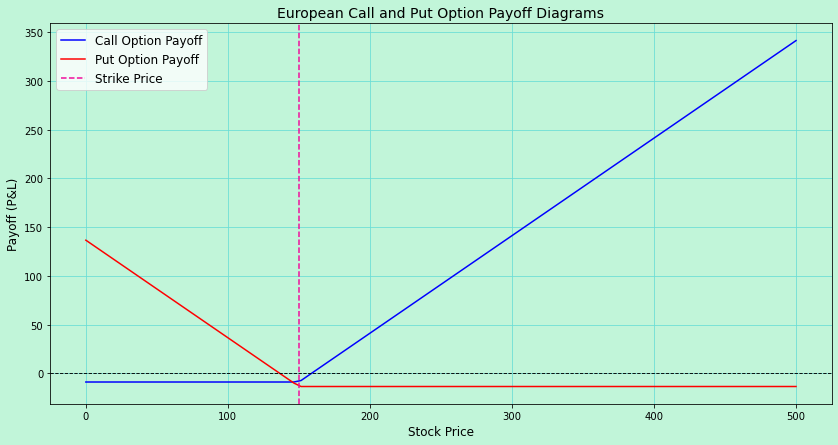

In [5]:
def call_payoff(S, K):
    return np.maximum(S - K,0)

def put_payoff(S, K):
    return np.maximum(K - S,0)

StockPrices = np.linspace(0, 500, 100)  # Range of 100 underlying asset prices from 50-500.

# Calculate Payoffs.
call_payoffs = call_payoff(StockPrices, K)- call_price  # Array conatining 100 payoffs of Call Option for various S.
put_payoffs = put_payoff(StockPrices, K)- put_price

# Plotting the Payoff diagram for Call And Put Option.
plt.figure(figsize=(14, 7), facecolor='#c1f5d9')
plt.plot(StockPrices, call_payoffs, label='Call Option Payoff', color='blue')
plt.plot(StockPrices, put_payoffs, label='Put Option Payoff', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=0.9)  # Adding x-axis.
plt.axvline(K, linestyle='--', color='#f00c9c', label='Strike Price')  # Adding vertical line at Strike Price.
plt.xlabel('Stock Price', fontsize = 12)
plt.ylabel('Payoff (P&L)',fontsize = 12)
plt.title('European Call and Put Option Payoff Diagrams', fontsize = 14)
plt.legend(fontsize='large')
plt.grid(True, color='#6aded6')
plt.gca().set_facecolor('#c1f5d9')  # Set background colour behind the grid.
plt.show()

### Replication

The job of a derivatives trader is to *replicate* the derivatives their customers want to buy. They will sell them to their customers at just a little more than the cost of replication. In this way, a derivatives trader guarantee that they will make a profit. The price of a derivative is equal to the cost of replicating that derivative.

### Replicating a call option

**Theorem:** (Replicating a call option)

Suppose that at time $0$ you receive the amount $V(S_0,0,K,T,r,\sigma)$(Black-Scholes price). Suppose that at every moment in time from $0$ to maturity $T$ you ensure that you are holding exactly 
$$\Delta:=\frac{\partial V}{\partial S_t}\longrightarrow \text{(Purchase this every moment in time)}$$
units of the stock and you put any remaining cash into a risk-free bank account. At time $T$ you liquidate your position, selling any stock you hold and withdrawing any money from the risk-free account. You will then have exactly $\max\{S_T-K,0\}$ which is the payoff of a European Call Option.

Lets plot the payoff of a European call option with strike $K=100$ and maturity $T$ against $S_T$, the final stock price.

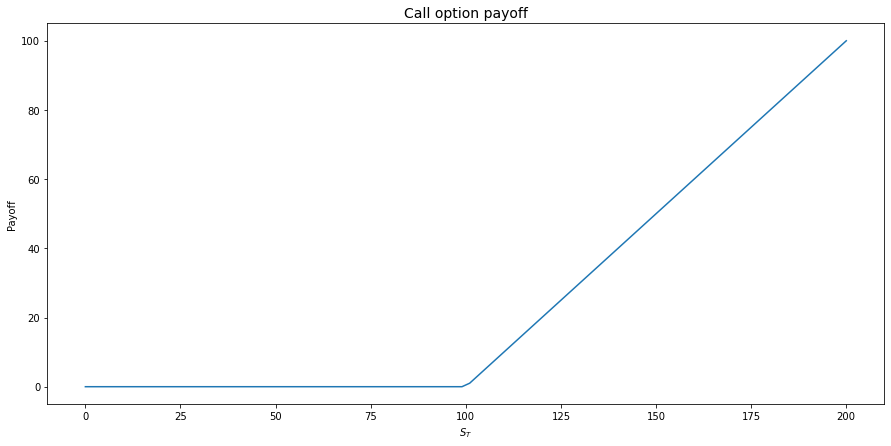

In [2]:
plt.rcParams['figure.figsize'] = [15,7]

ST = np.linspace(0,200,100)
K = 100
payoff = np.maximum(ST-K,0)
ax = plt.gca()
ax.plot(ST, payoff)
ax.set_xlabel('$S_T$')
ax.set_ylabel('Payoff');
ax.set_title('Call option payoff', fontsize = 14);

Now lets do the same for European put option.

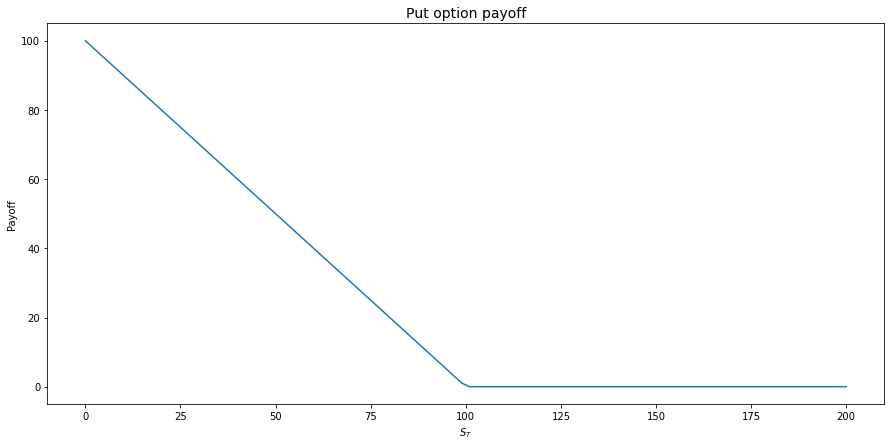

In [6]:
ST = np.linspace(0,200,100)
K = 100
payoff = np.maximum(K-ST,0)
ax = plt.gca()
ax.plot(ST, payoff)
ax.set_xlabel('$S_T$')
ax.set_ylabel('Payoff');
ax.set_title('Put option payoff', fontsize = 14 );

Now, lets consider a portfolio consisting of buying a *European call option* and at the same time selling a *European put option* with strike $K$ and maturity $T$. This portfolio can be replicated by purchasing $1$ unit of stock and putting $e^{-rT} K$ into a risk-free bank account at time $0$.
Lets plot portfolio *payoff* against stocks terminal price $S_T$ and deduce that:
$$\text{Call Price at time 0}-\text{Put Price at time 0}=S_0-e^{-rT}K$$ 

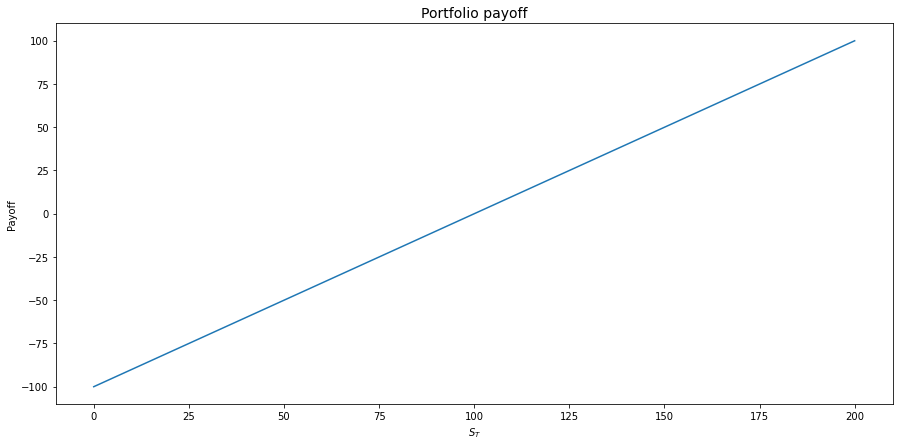

In [4]:
ST = np.linspace(0,200,100)
K = 100
payoff = np.maximum(ST-K,0)-np.maximum(K-ST,0)
ax = plt.gca()
ax.plot(ST, payoff)
ax.set_xlabel('$S_T$')
ax.set_ylabel('Payoff');
ax.set_title('Portfolio payoff', fontsize = 14 );

We see that the portfolio payoff is equal to $S-K$. A payoff of $S$ can be replicated by buying the stock. A payoff of $K$ can be replicated by putting $e^{-rT}K$ into the risk-free bank account at time $0$. 

Lets plot graphs of the Black-Scholes price of an option against the stock price $S_t$ for a European call option with strike $K=100$, maturity $T=1$ in a model where $r=0.02$, $\sigma=0.2$ and $S_0=110$. We should plot graphs for values $t \in \{0, \frac{1}{10}, \frac{2}{10}, \ldots, \frac{9}{10} \}$.

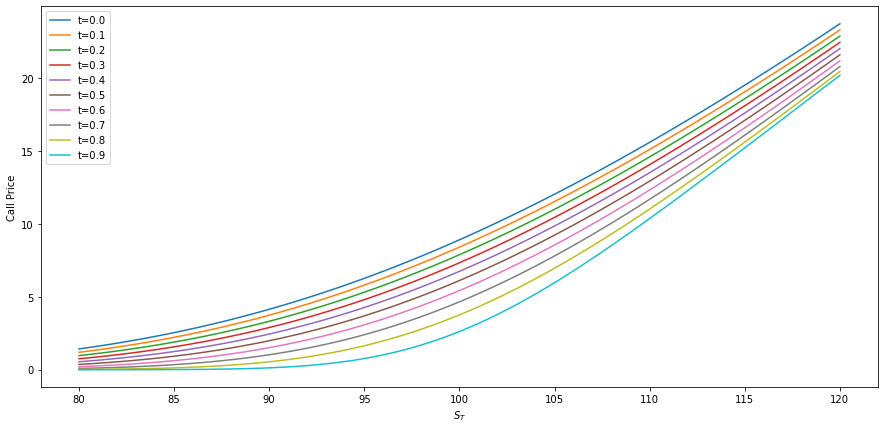

In [10]:
St = np.linspace(80,120,100)
ax = plt.gca()
for i in range(0,10):
    t = i/10
    V = blackscholes(r=0.02, S=St, K=100, T=1, sigma=0.2, t=t, type="call")
    ax.plot(St,V, label='t={}'.format(t))
ax.set_xlabel('$S_T$')
ax.set_ylabel('Call Price')
ax.legend();

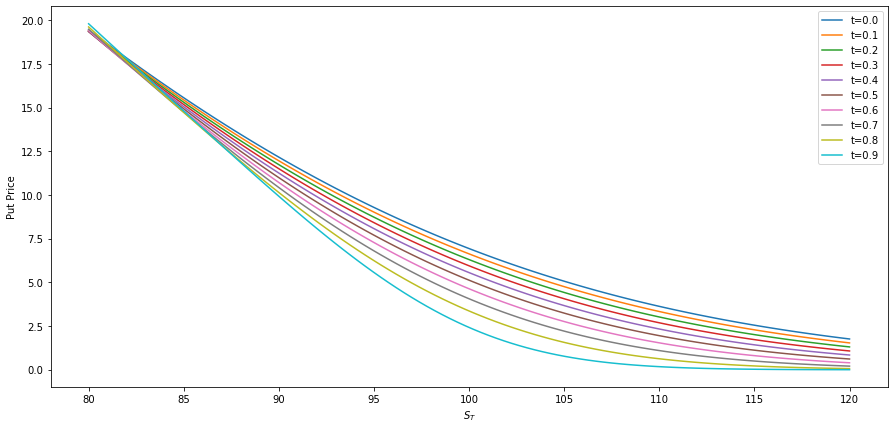

In [11]:
St = np.linspace(80,120,100)
ax = plt.gca()
for i in range(0,10):
    t = i/10
    V = blackscholes(r=0.02, S=St, K=100, T=1, sigma=0.2, t=t, type="put")
    ax.plot(St,V, label='t={}'.format(t))
ax.set_xlabel('$S_T$')
ax.set_ylabel('Put Price')
ax.legend();

## Simulating GBM
In the assumptions of the `Black-Scholes model`, the stock follows *geometric Brownian motion*. This means
it satisfies the SDE:

$$ d S_t = S_t(\mu \, dt + \sigma \, dW_t) $$

for some constants $\mu$ and $\sigma$.
Therefore, we can simulate Stock prices using either:
- Euler scheme (which gives Discrete time GBM)  `or`
- Analytical Formula for stock price SDE using Ito's lemma.

#### Euler Scheme
We can simulate stock prices $S_t$ approximately using the difference equation:
$$ S_{t+\delta t} \approx S_t + S_t(\mu \, \delta t + \sigma \delta W_t) $$
where $\delta W_t=W_{t+\delta t}-W_t$.
This can further simplify to:
$$
\boxed{
S_{t+\delta t} \approx S_t + S_t(\mu \, \delta t + \sigma \sqrt{\delta t} \epsilon_t)}
$$
where we simulate the $\epsilon_t$ as independent, identically distributed standard normals. Notice that this is
only an approximate simulation. Only in the limit as $\delta t \to 0$ does this become exact. The resulting $S_t$ will have *approximately* the same distribution as the true solution of geometric Brownian motion.

#### Analytical Formula for stock price SDE using Ito's lemma.
Using Ito's Lemma and taking $Z_t=\log(S_t)$. Our original SDE
$$ d S_t = S_t \mu \, dt + S_t \sigma \, dW_t $$
transforms to:
$$d Z_t= \left(\mu - \tfrac{1}{2} \sigma^2 \right) dt + \sigma \, dW_t$$
which when solved gives:
$$S_t = S_0 \exp\left( (\mu - \frac{1}{2}\sigma^2 ) + \sigma W_t\right)$$
Notice that if $S_0>0$ then $S_t>0$ for all times $t \geq 0$ since the exponential of a real number is positive and since $S_0$ is positive to begin with.

We can then `exactly` simulate $S_t$ by first simulating $Z_t$ on a discrete time grid using the equation:
$$ Z_{t+\delta t}= Z_{t} + (\mu - \tfrac{1}{2} \sigma^2 ) \delta t + \sigma \, \delta W_t,$$
which can further simplify to the difference equation:
$$
\boxed{
Z_{t+\delta t}= Z_{t} + (\mu - \tfrac{1}{2} \sigma^2 ) \delta t + \sigma \sqrt{\delta t} \, \epsilon_t}
$$
with $Z_0=\log(S_0)$ and then taking $S_t=\exp(Z_t).$ The resulting $S_t$ will have an identical distribution
to geometric Brownian motion. 